In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:


fileName = '/content/drive/MyDrive/Step Up Data Set.csv'

In [ ]:
data = pd.read_csv(fileName)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data2 = data

In [ ]:
# Convert total charges to float 
# The null values are converting to nan
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:


# convert total charges to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# identify the values that could not be converted
invalid_values = data[data['TotalCharges'].isna()]['TotalCharges']

#print(data2)
print("Invalid values:", invalid_values)

Invalid values: 488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data.isna()
#to see the number of  missing values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
set(data.duplicated())

{False}

In [ ]:
# we can pass the result of the df.duplicated into a set to see if there is any instance of True
# No duplicates in the data
set(data.duplicated())

{False}

In [ ]:
data.shape

(7043, 21)

In [ ]:
# Checking the class imbalance
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
df=data

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


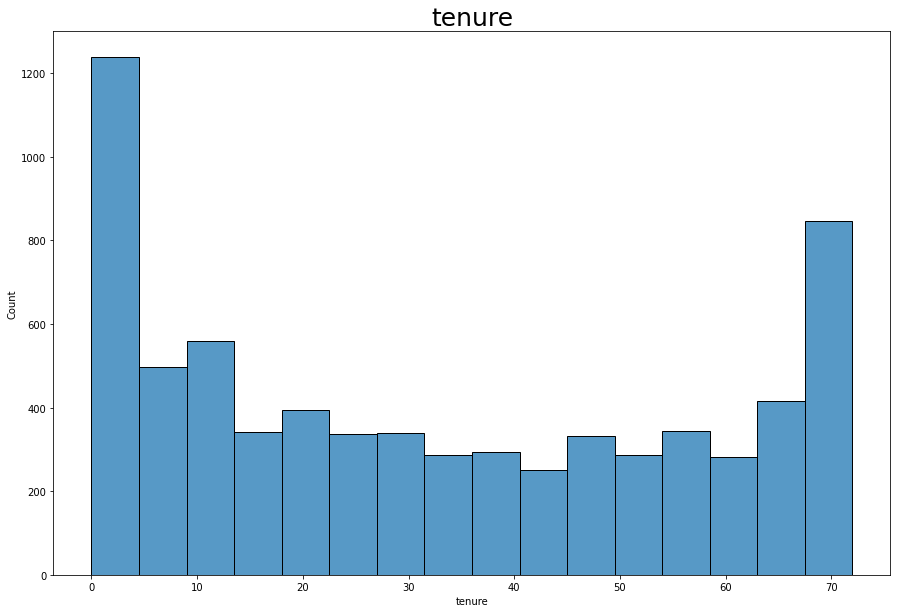

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df.tenure)
plt.title('tenure', fontsize = 25)
plt.show()

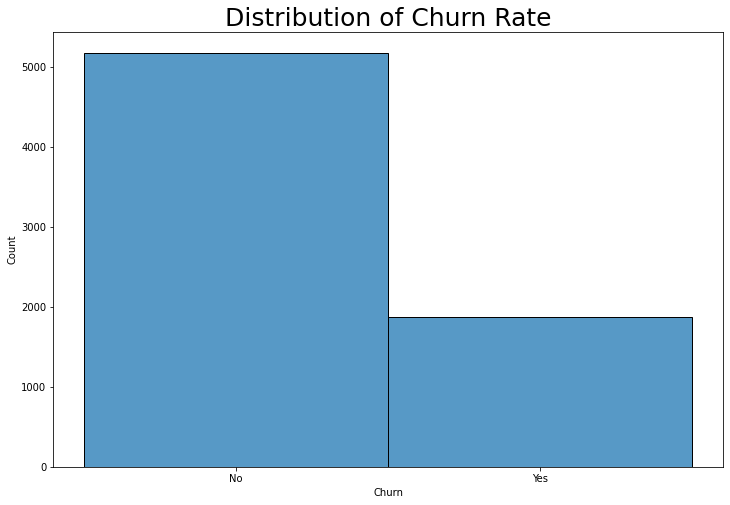

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df.Churn)
plt.title('Distribution of Churn Rate', fontsize = 25)
plt.show()

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

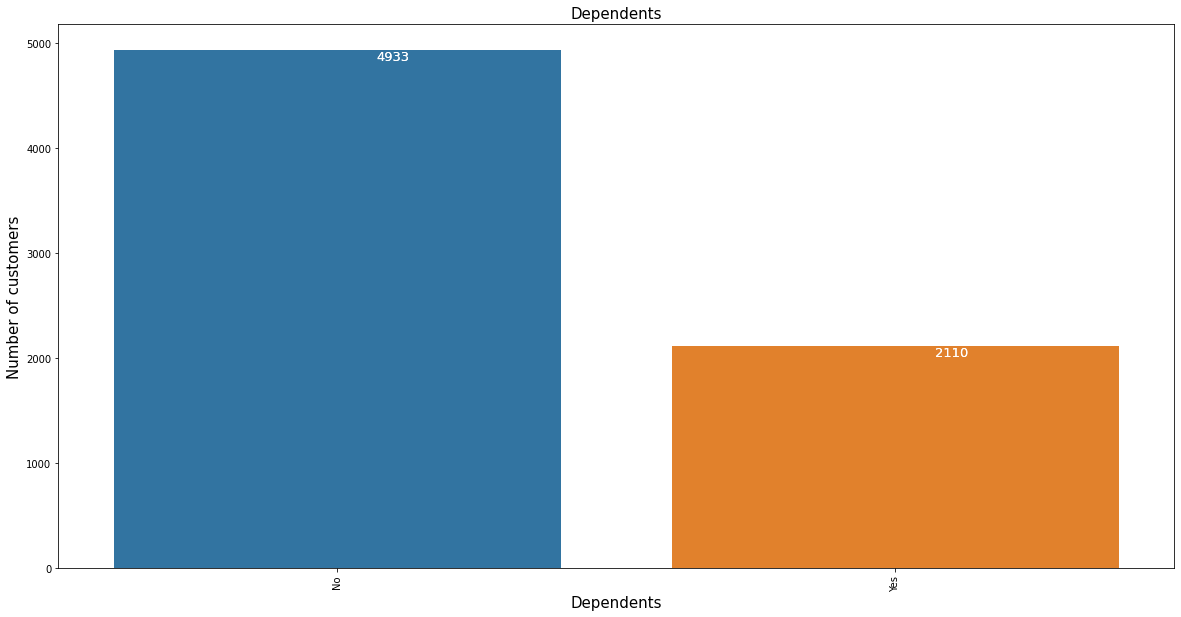

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Dependents', data=df)
ax.set_title('Dependents' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)

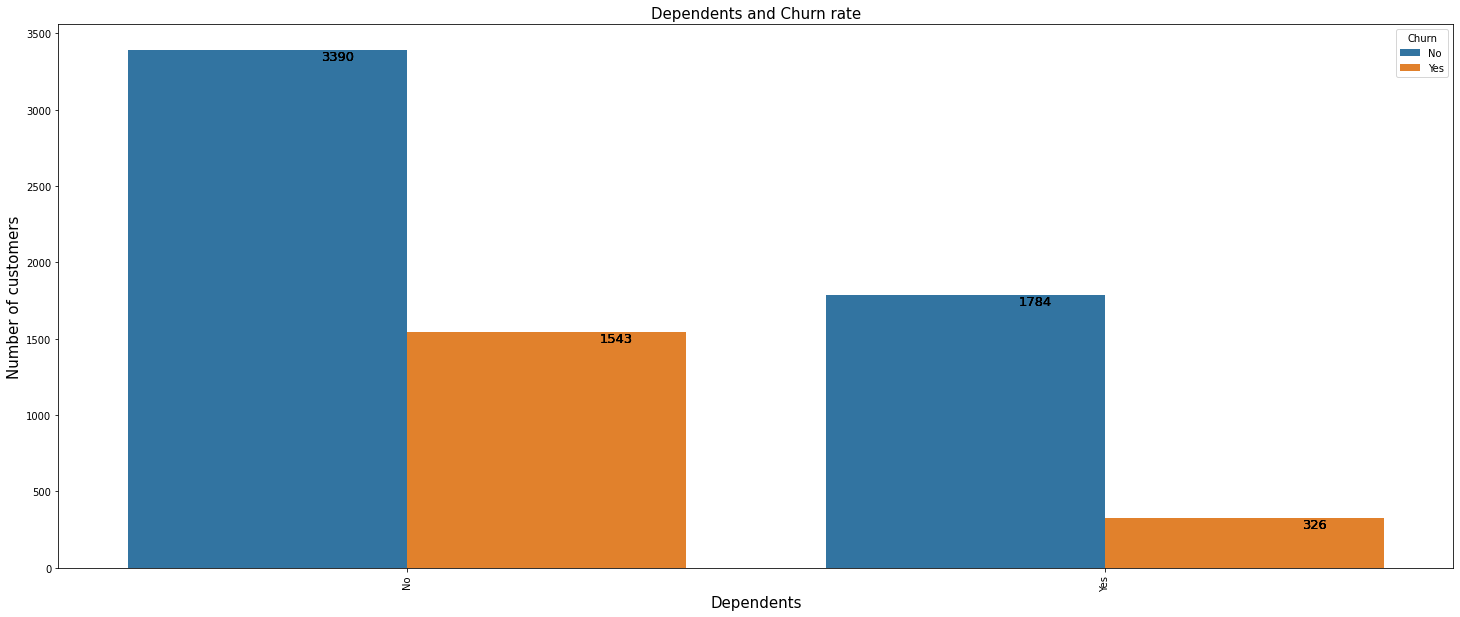

In [ ]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='Dependents',hue ='Churn', data=df)
ax.set_title('Dependents and Churn rate' , fontsize = 15)
plt.xlabel('Dependents', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='black',  size=13)
        



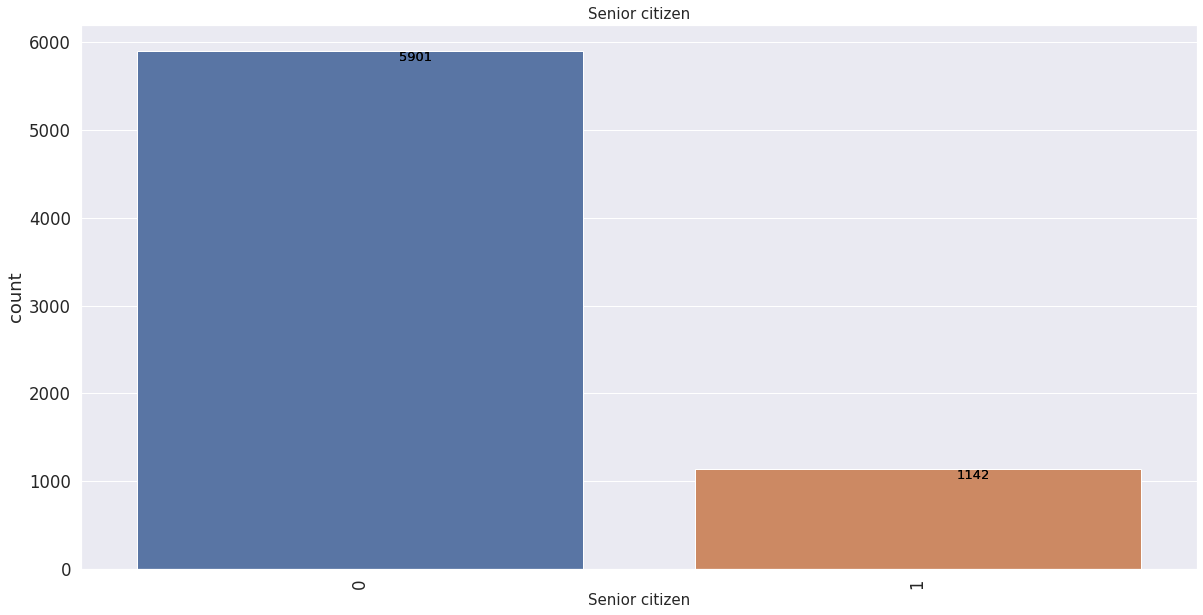

In [ ]:
 

plt.figure(figsize=(20,10))
ax=sns.countplot(x='SeniorCitizen', data=df)
ax.set_title('Senior citizen' , fontsize = 15)
plt.xlabel('Senior citizen', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='black', size=13)

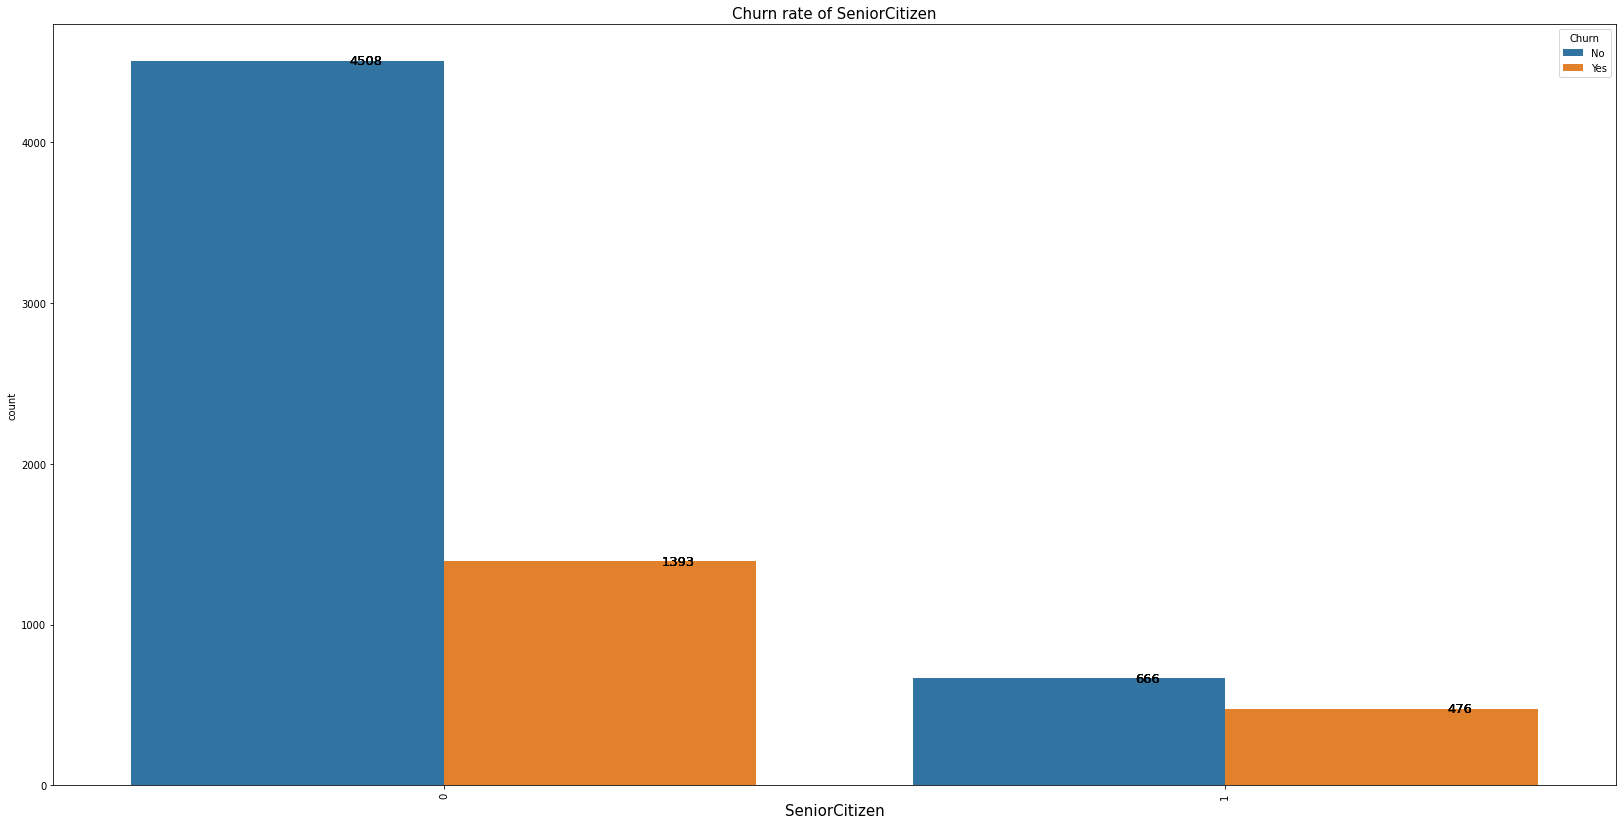

In [ ]:
plt.figure(figsize=(28,14))
ax=sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.set_title('Churn rate of SeniorCitizen' , fontsize = 15)
plt.xlabel('SeniorCitizen', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.3, p.get_height()), ha='center', va='center', color='black', size=13)

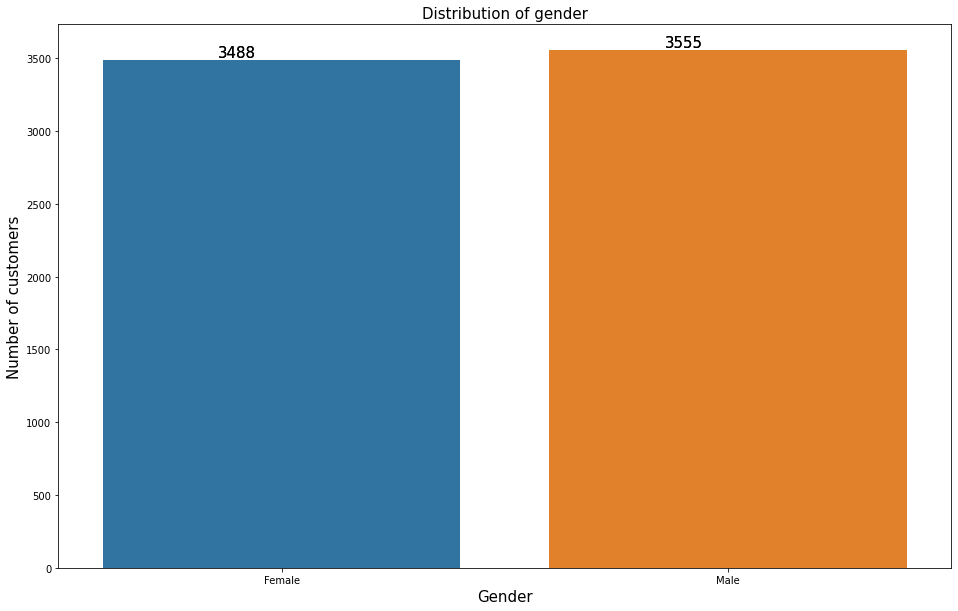

In [ ]:
 

plt.figure(figsize=(16,10))
ax=sns.countplot(x='gender', data=df)
ax.set_title('Distribution of gender' , fontsize = 15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

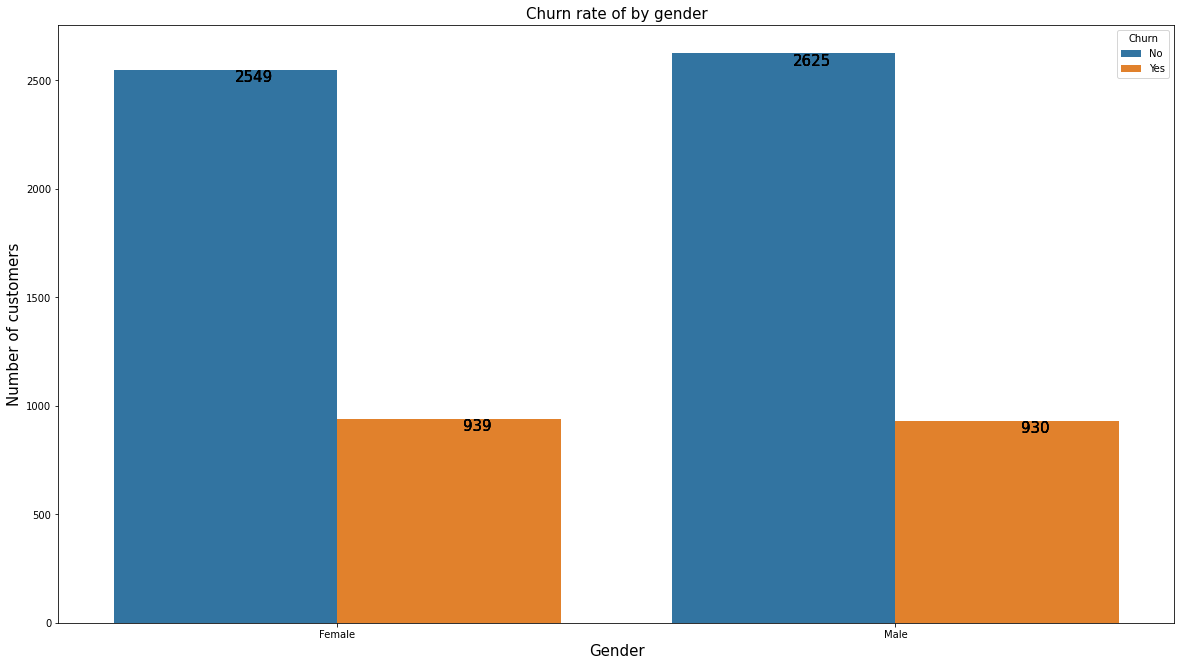

In [ ]:


plt.figure(figsize=(20,11))
ax=sns.countplot(x='gender', hue='Churn', data=df)
ax.set_title('Churn rate of by gender' , fontsize = 15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)
        

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:

bins = pd.cut(df['tenure'], 7)


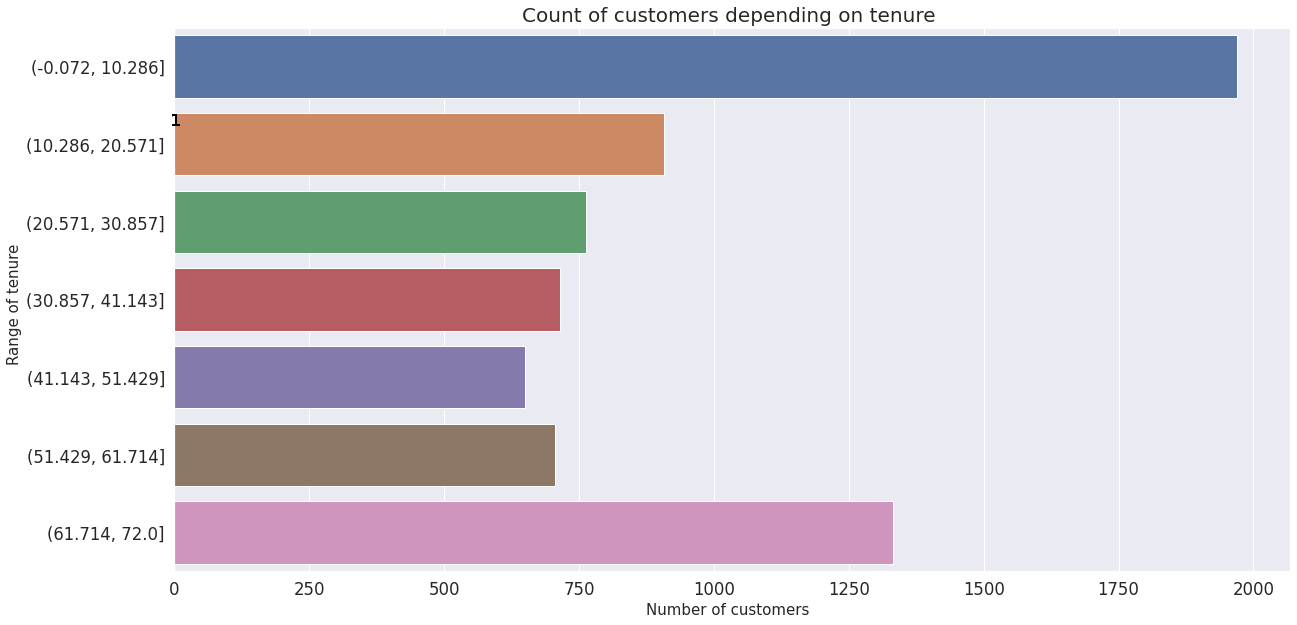

In [ ]:
 # 

plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins)
sns.set(font_scale=1.5)
ax.set_title('Count of customers depending on tenure ' , fontsize = 20)
plt.xlabel('Number of customers  ', fontsize=15)
plt.ylabel('Range of tenure  ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

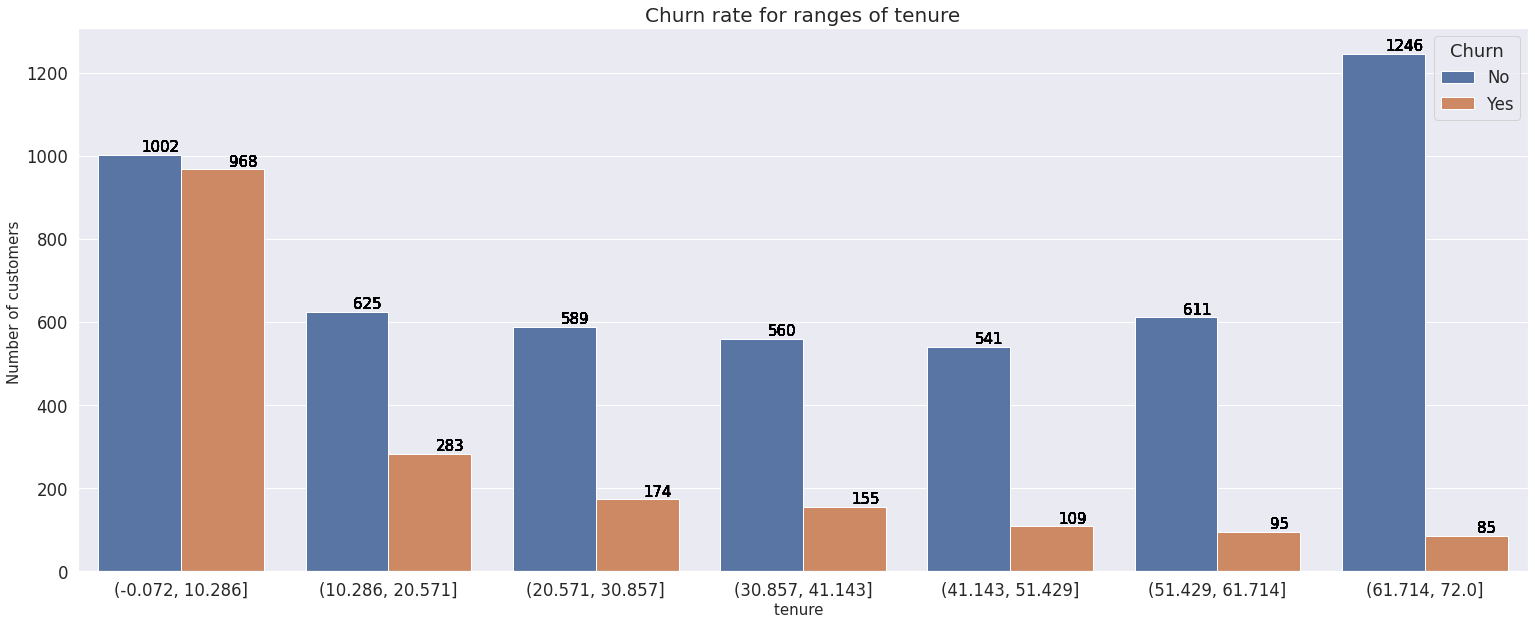

In [ ]:
 

plt.figure(figsize=(26,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins,  hue='Churn', data=df)
ax.set_title('Churn rate for ranges of tenure' , fontsize = 20)
plt.xlabel('tenure  ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

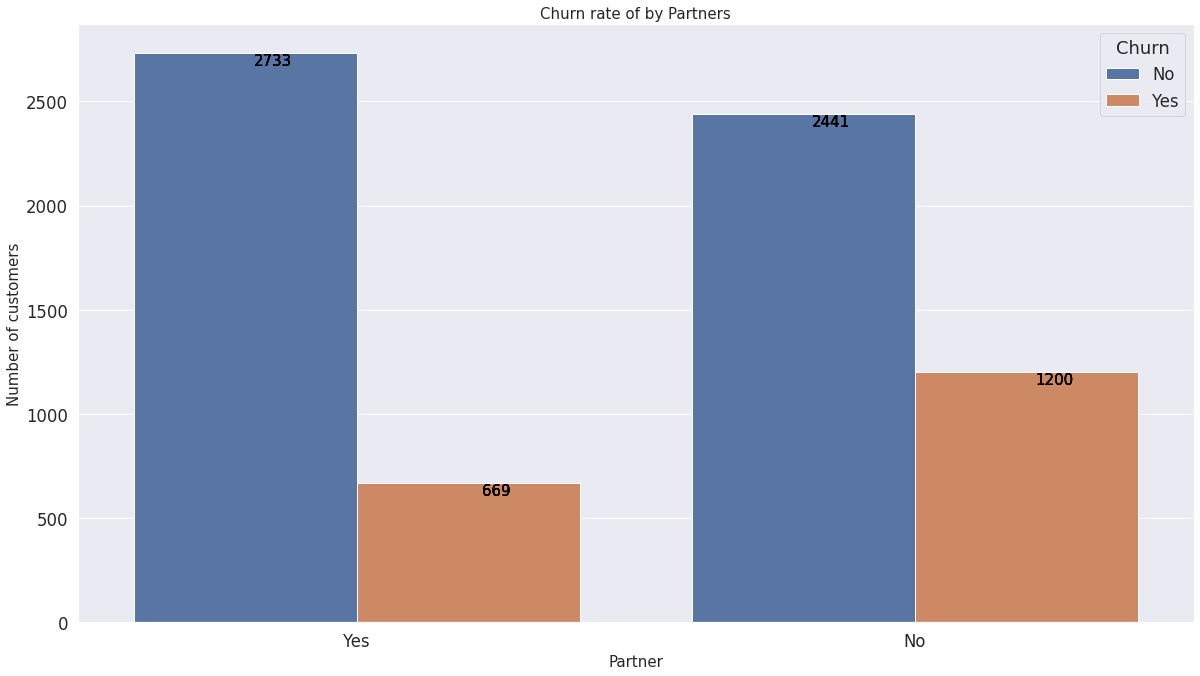

In [ ]:

plt.figure(figsize=(20,11))
ax=sns.countplot(x='Partner', hue='Churn', data=df)
ax.set_title('Churn rate of by Partners' , fontsize = 15)
plt.xlabel('Partner', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

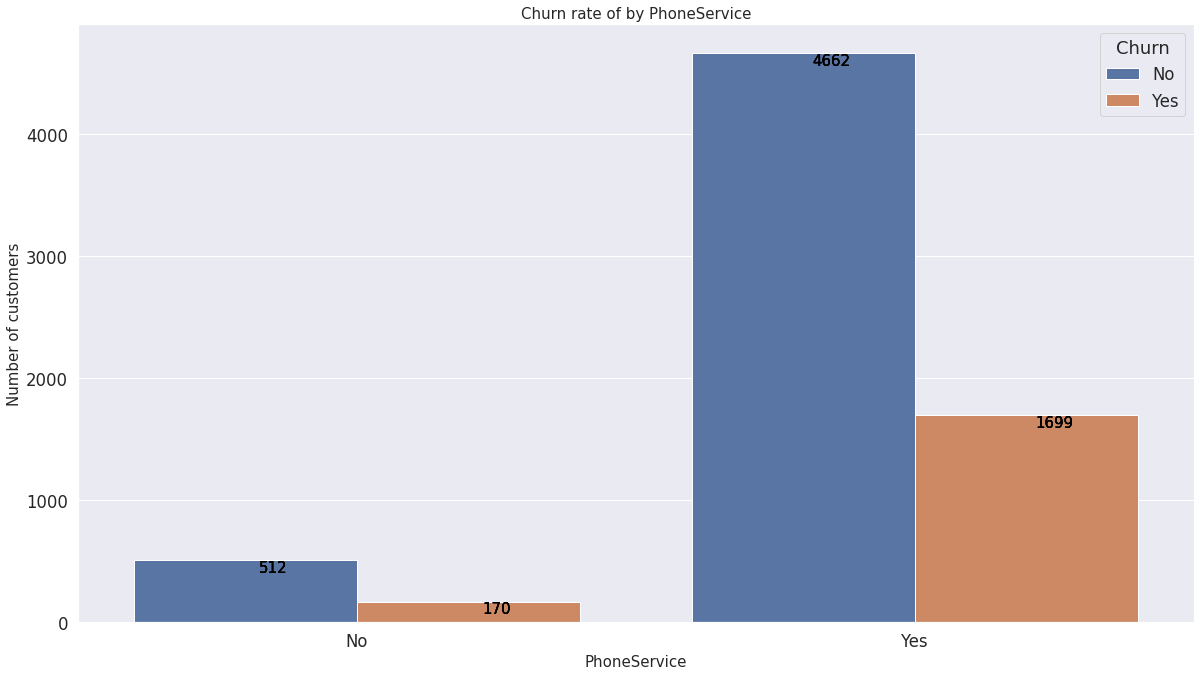

In [ ]:

plt.figure(figsize=(20,11))
ax=sns.countplot(x='PhoneService', hue='Churn', data=df)
ax.set_title('Churn rate of by PhoneService' , fontsize = 15)
plt.xlabel('PhoneService', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

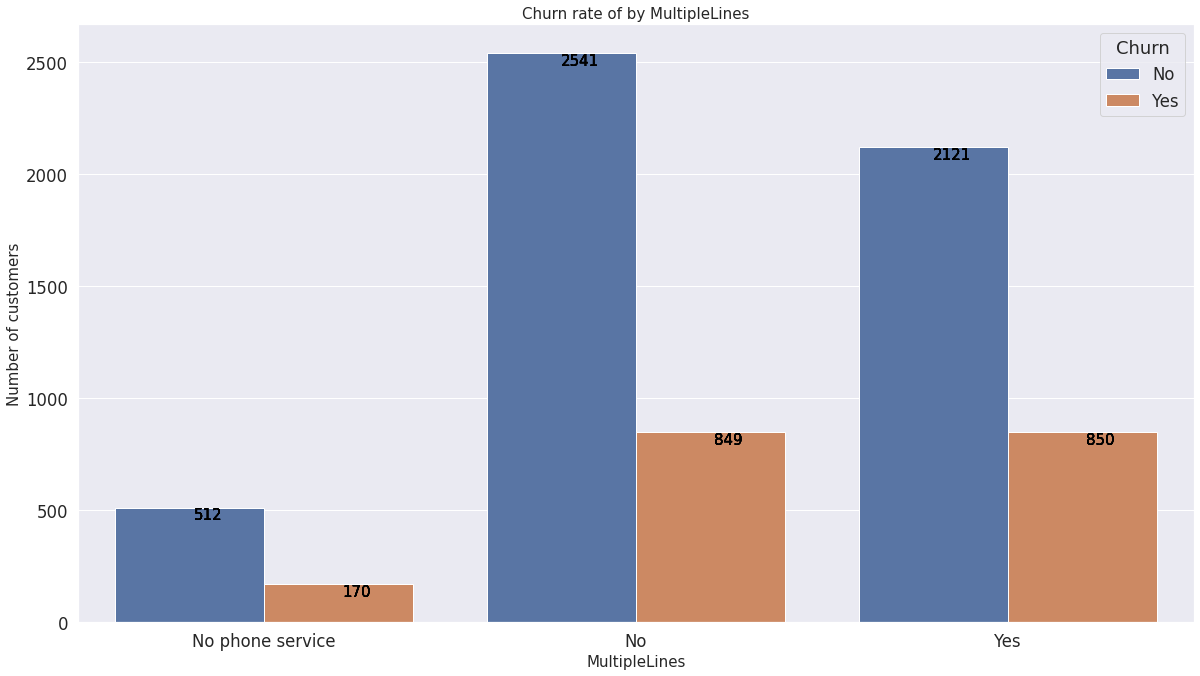

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='MultipleLines', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate of by MultipleLines' , fontsize = 15)
plt.xlabel('MultipleLines', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

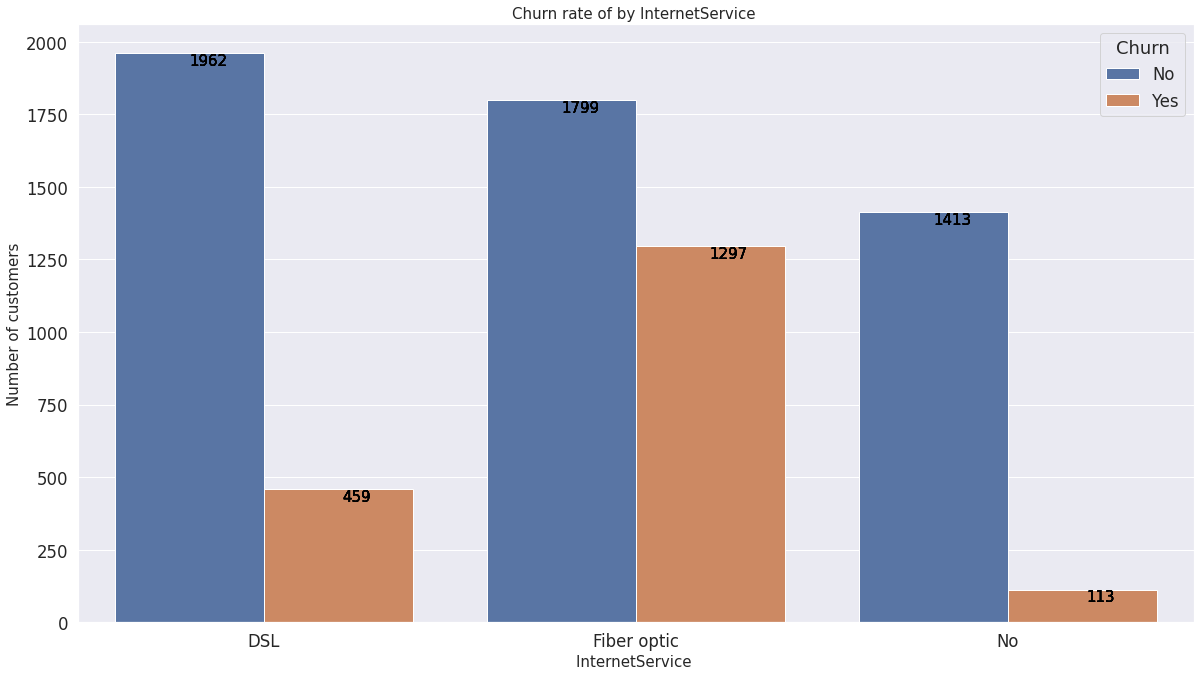

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='InternetService', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate of by InternetService ' , fontsize = 15)
plt.xlabel('InternetService ', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

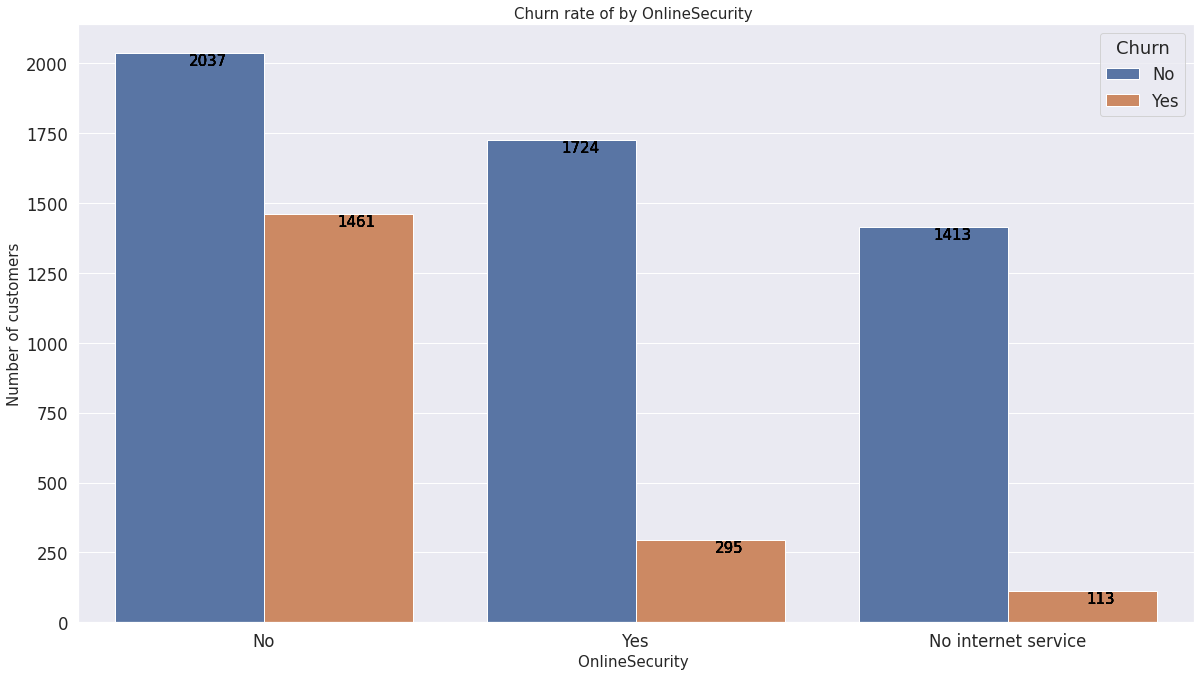

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate of by OnlineSecurity ' , fontsize = 15)
plt.xlabel('OnlineSecurity ', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

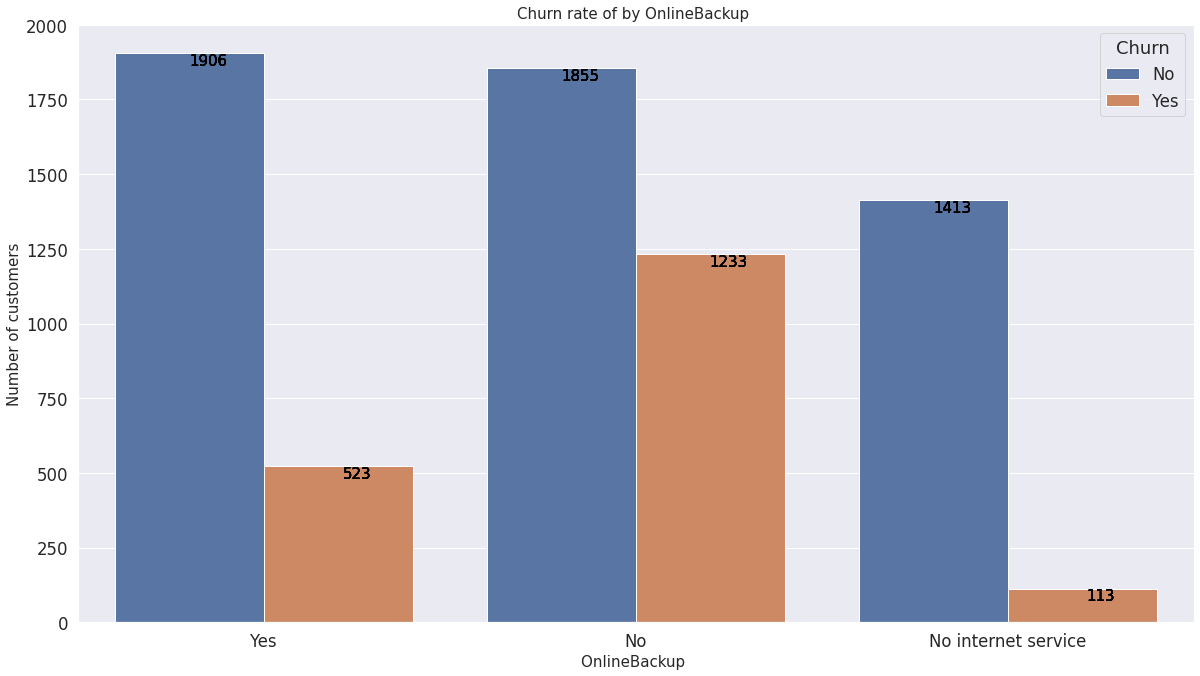

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='OnlineBackup', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate of by OnlineBackup ' , fontsize = 15)
plt.xlabel('OnlineBackup ', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

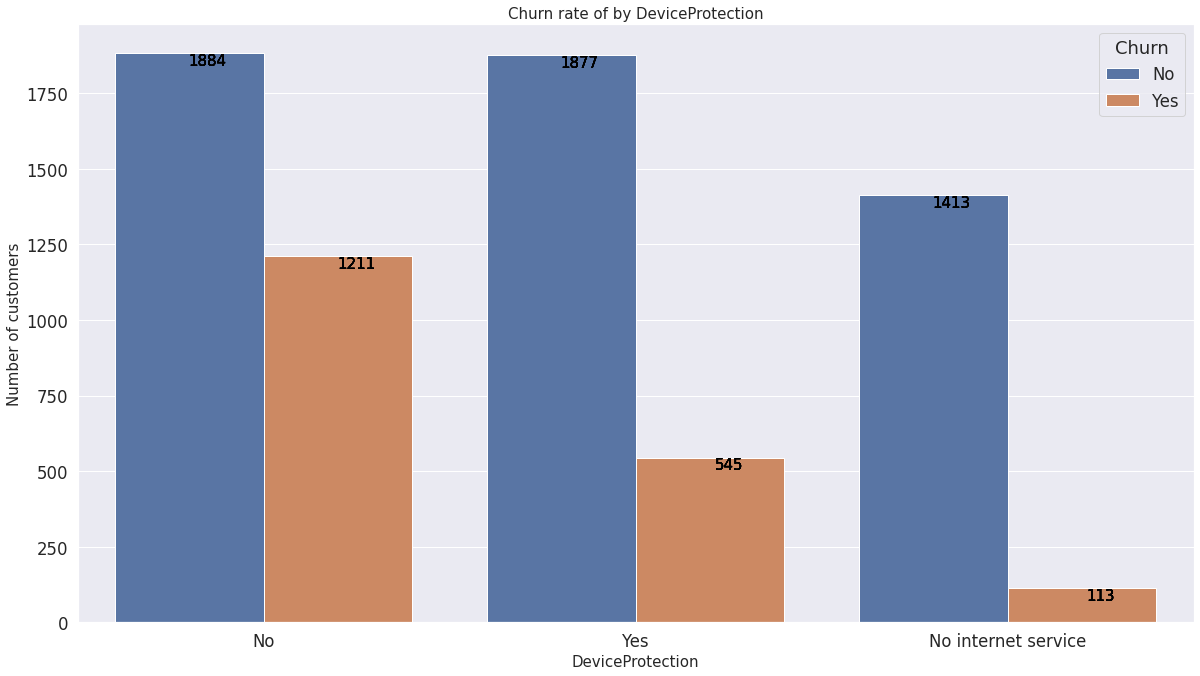

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='DeviceProtection', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate of by DeviceProtection' , fontsize = 15)
plt.xlabel('DeviceProtection', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

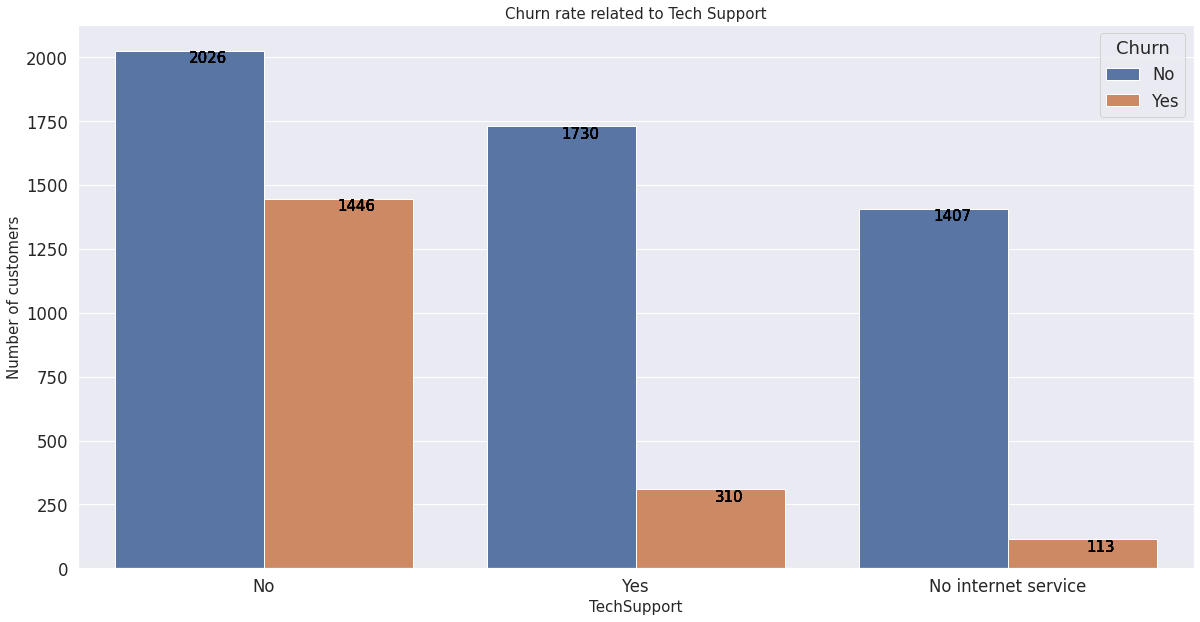

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='TechSupport', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Churn rate related to Tech Support' , fontsize = 15)
plt.xlabel('TechSupport', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

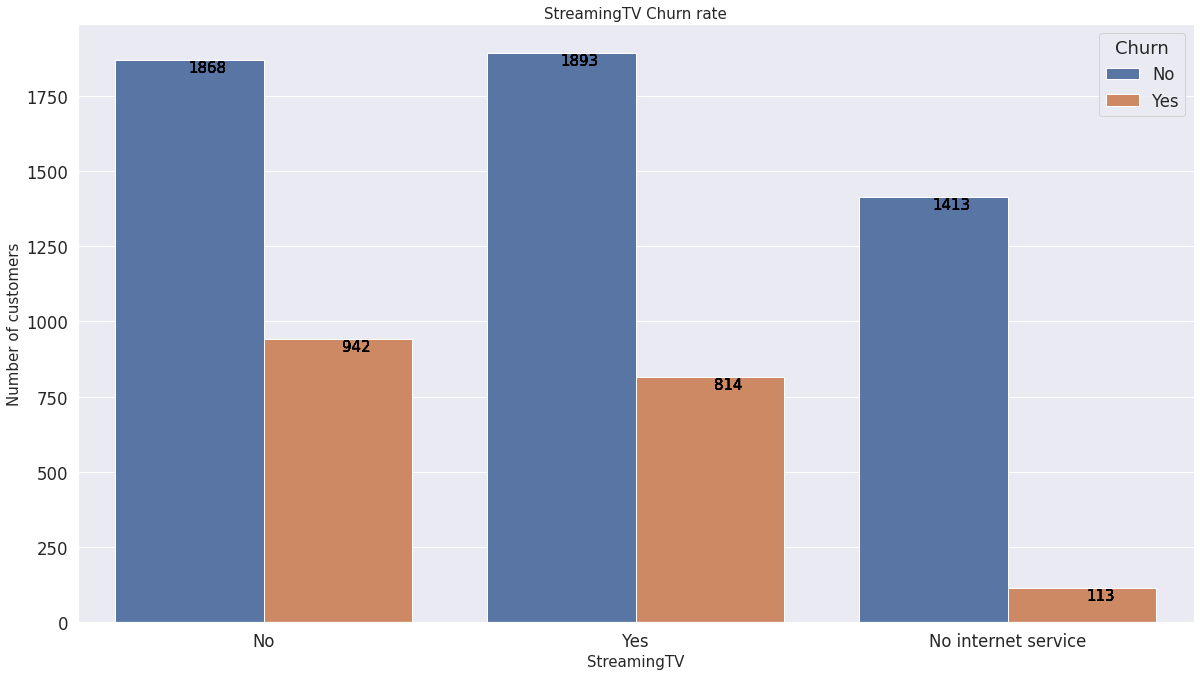

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingTV', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('StreamingTV Churn rate' , fontsize = 15)
plt.xlabel('StreamingTV', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

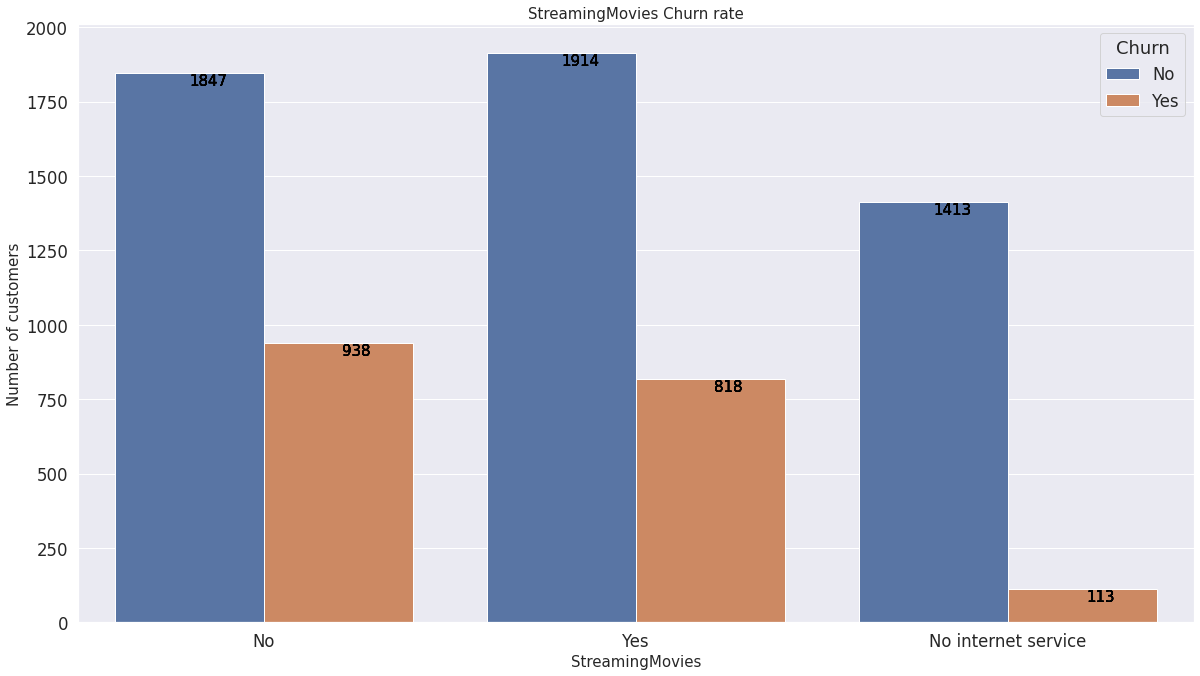

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='StreamingMovies', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('StreamingMovies Churn rate' , fontsize = 15)
plt.xlabel('StreamingMovies', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

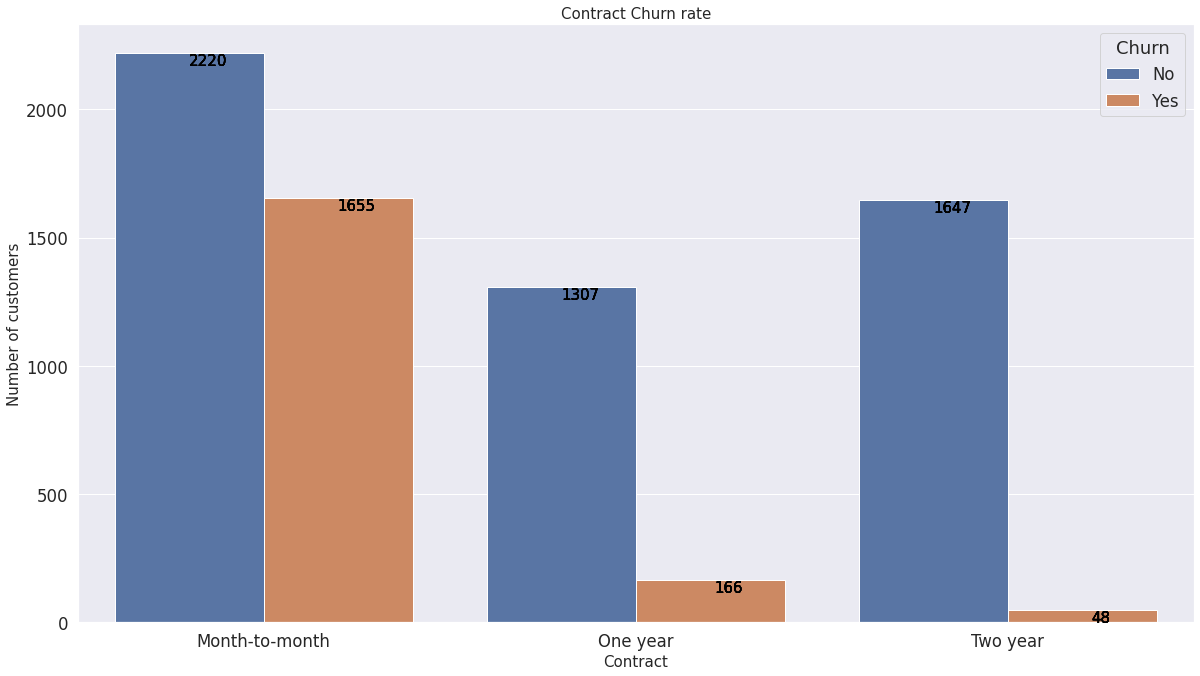

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='Contract', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('Contract Churn rate' , fontsize = 15)
plt.xlabel('Contract', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

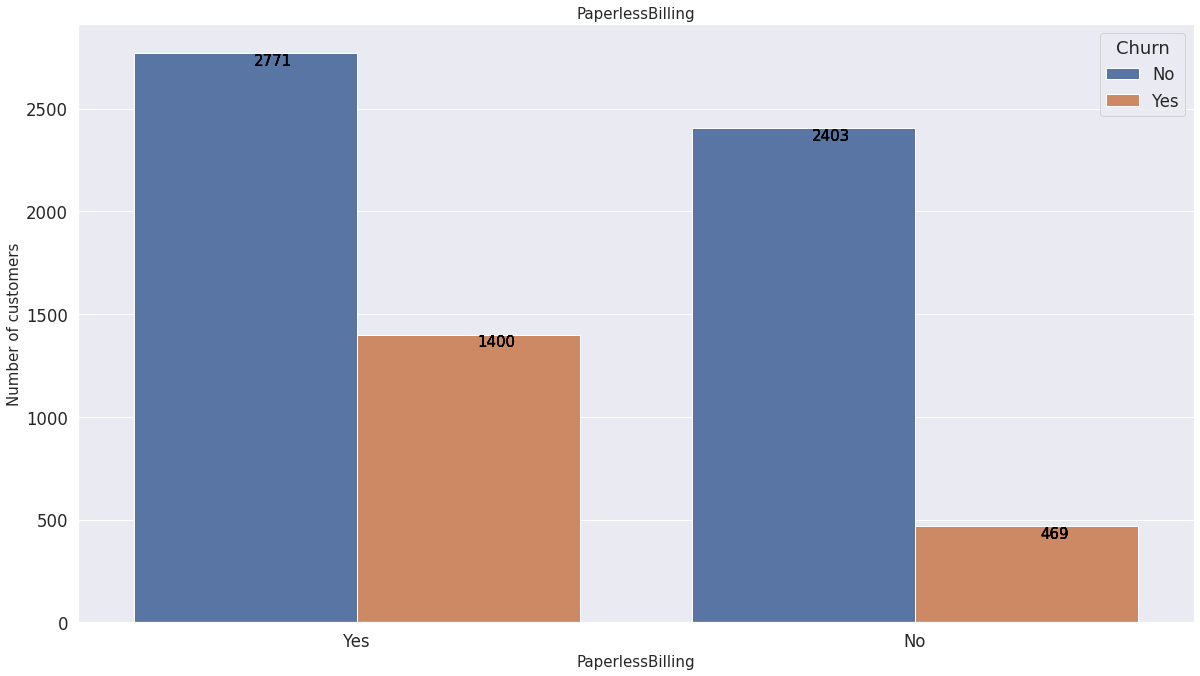

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('PaperlessBilling' , fontsize = 15)
plt.xlabel('PaperlessBilling', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

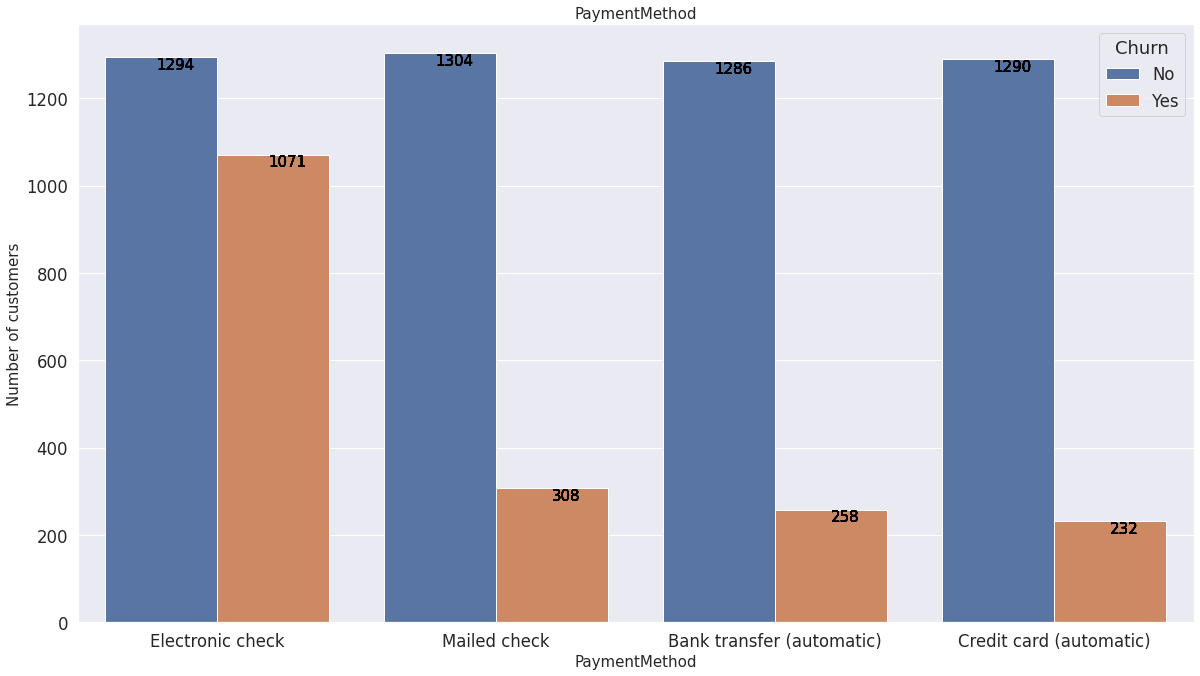

In [ ]:
plt.figure(figsize=(20,11))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=df)
sns.set(font_scale=1.5)
ax.set_title('PaymentMethod' , fontsize = 15)
plt.xlabel('PaymentMethod', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)

In [ ]:
# To put the monthlycharges in bins
bins2 = pd.cut(df['MonthlyCharges'], 10)

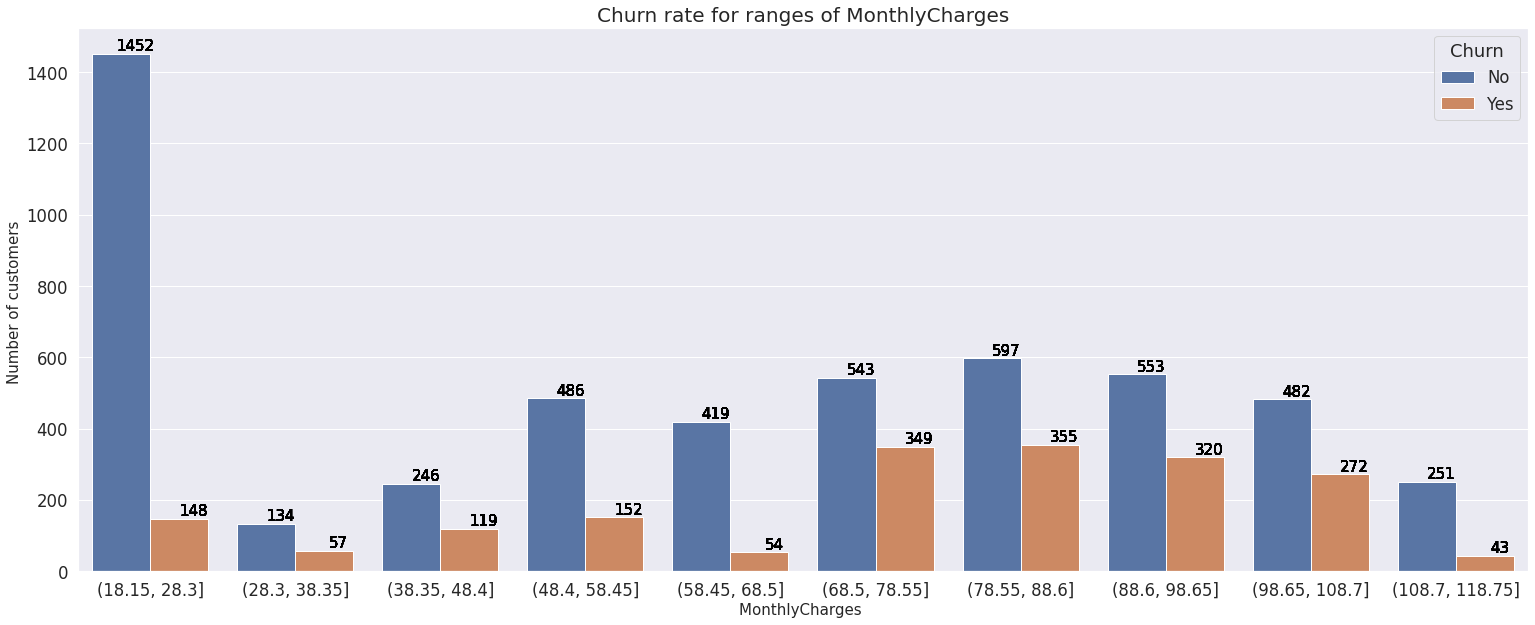

In [ ]:

plt.figure(figsize=(26,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins2,  hue='Churn', data=df)
ax.set_title('Churn rate for ranges of MonthlyCharges' , fontsize = 20)
plt.xlabel('MonthlyCharges ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# Total charges in bins
bins3 = pd.cut(df['TotalCharges'], 10)

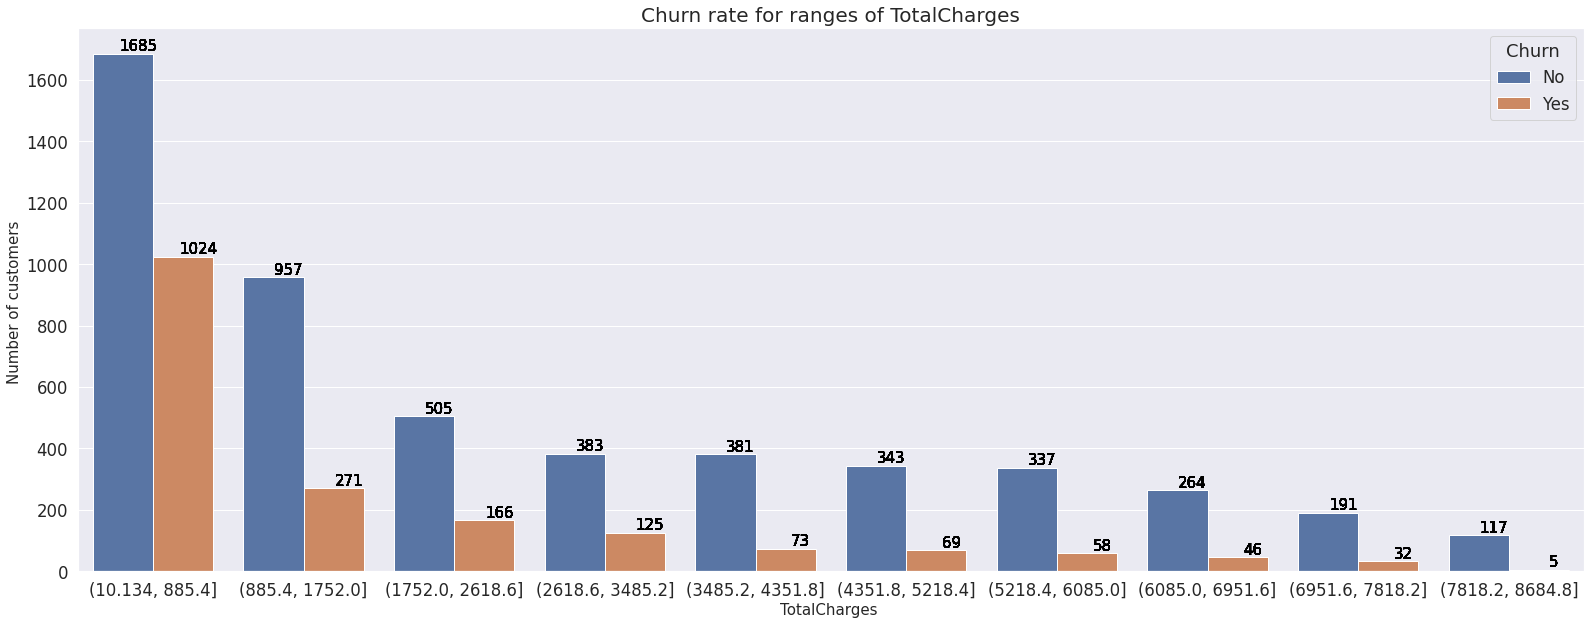

In [ ]:
plt.figure(figsize=(27,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins3,  hue='Churn', data=df)
ax.set_title('Churn rate for ranges of TotalCharges' , fontsize = 20)
plt.xlabel('TotalCharges ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# To drop missing values
df= df.dropna()

In [ ]:
t=7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<Axes: >

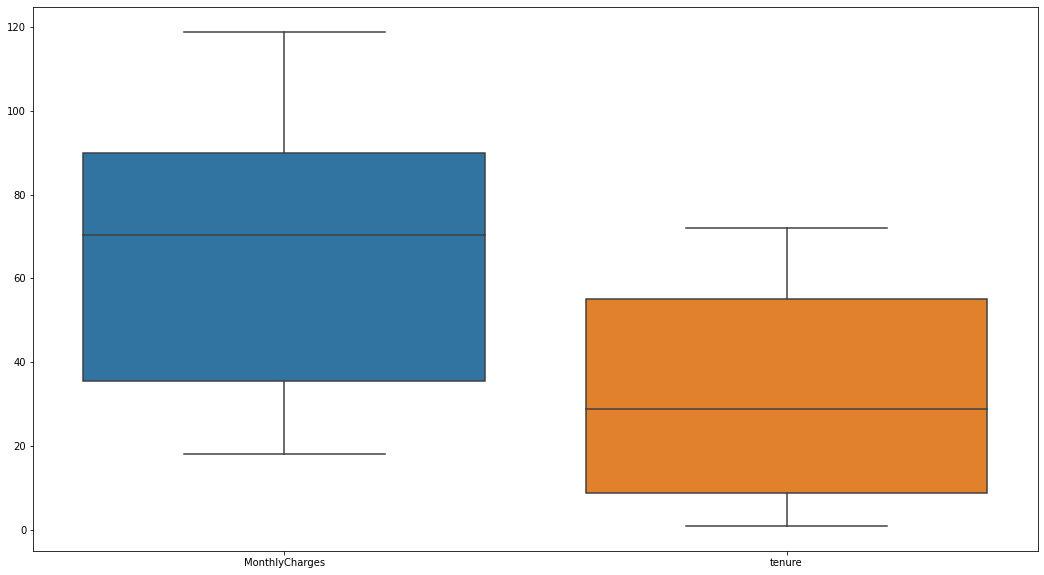

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df[['MonthlyCharges','tenure']])

<Axes: >

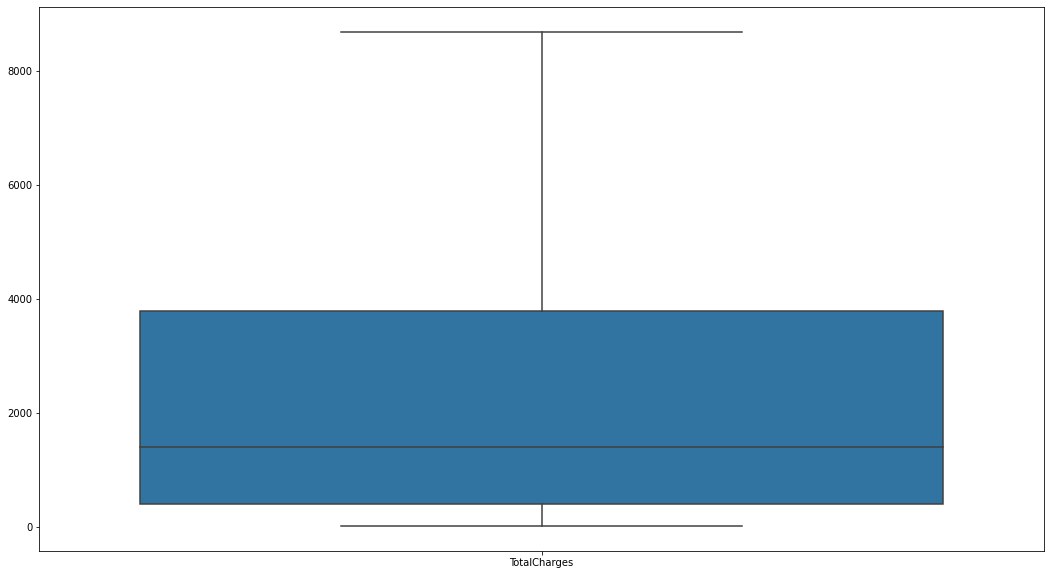

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df[['TotalCharges']])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
 # 
df = df.drop('customerID', axis=1)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df2=data

In [ ]:
# To split data into X and y variables before handling class imbalance using oversampling
X = df.drop('Churn', axis=1)
y = df['Churn']
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X, y)



In [ ]:
X_resampled.shape

(10326, 19)

In [ ]:
y_resampled.shape

(10326,)

In [ ]:

y_resampled.value_counts(normalize=True)

No     0.5
Yes    0.5
Name: Churn, dtype: float64

<Axes: title={'center': 'Class Balance'}, xlabel='Churn', ylabel='count'>

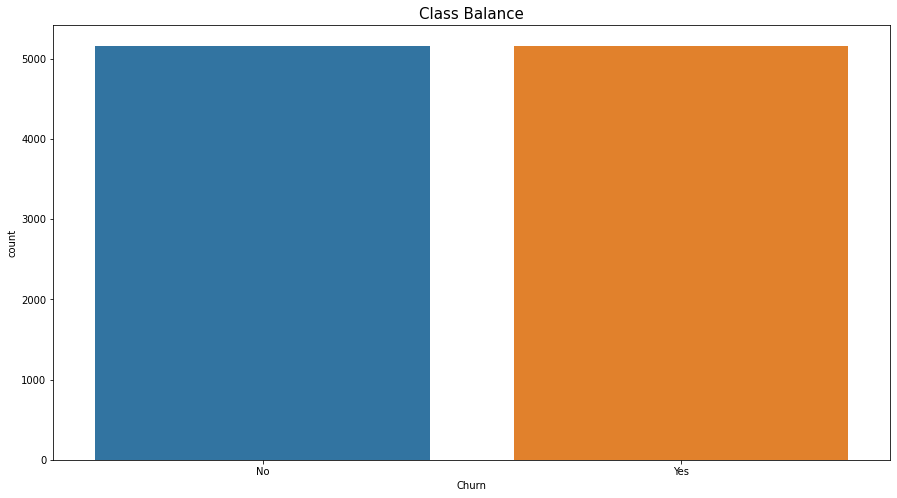

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Class Balance', fontsize=15)
sns.countplot(x= y_resampled)

In [ ]:
#Encoding
# encode categorical variables
le = LabelEncoder()
for col in X_resampled.select_dtypes(include='object'):
    X_resampled[col] = le.fit_transform(X_resampled[col])


In [ ]:
X_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y_resampled.tail()

10321    Yes
10322    Yes
10323    Yes
10324    Yes
10325    Yes
Name: Churn, dtype: object

In [ ]:

# Replace categorical values in the outcome column
y_resampled = y_resampled.replace({'Yes': 1, 'No': 0})

# Check the new values in the outcome column
print(y_resampled.unique())




[0 1]


In [ ]:
y_resampled.tail()

10321    1
10322    1
10323    1
10324    1
10325    1
Name: Churn, dtype: int64

In [ ]:
X = X_resampled

In [ ]:
y = y_resampled


In [ ]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# Instantiate SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the data
selector.fit(X_resampled, y_resampled)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X_resampled.columns[selected_features_indices]

# Print the names of the selected features
print(selected_features_names)


Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [ ]:

# Display the scores of the top 10 features
scores = selector.scores_
top_k_scores = sorted(scores, reverse=True)[:10]
top_k_indices = np.argsort(scores)[::-1][:10]

print("Top 5 feature scores:")
for i in range(len(top_k_scores)):
    print("Feature {}: Score = {:.2f}".format(top_k_indices[i], top_k_scores[i]))


Top 5 feature scores:
Feature 14: Score = 3184.29
Feature 4: Score = 2115.86
Feature 8: Score = 1258.81
Feature 11: Score = 1167.91
Feature 18: Score = 610.67
Feature 17: Score = 573.25
Feature 9: Score = 553.77
Feature 15: Score = 507.65
Feature 10: Score = 411.91
Feature 3: Score = 368.79


1. Contract (3184.29)
2. tenure (2115.86)
3. OnlineSecurity (1258.81)
4. TechSupport (1167.91)
5. TotalCharges (610.67)
6. MonthlyCharges (573.25)
7. OnlineBackup (553.77)
8. PaperlessBilling (507.65)
9. DeviceProtection (411.91)
10. Dependents (368.79)


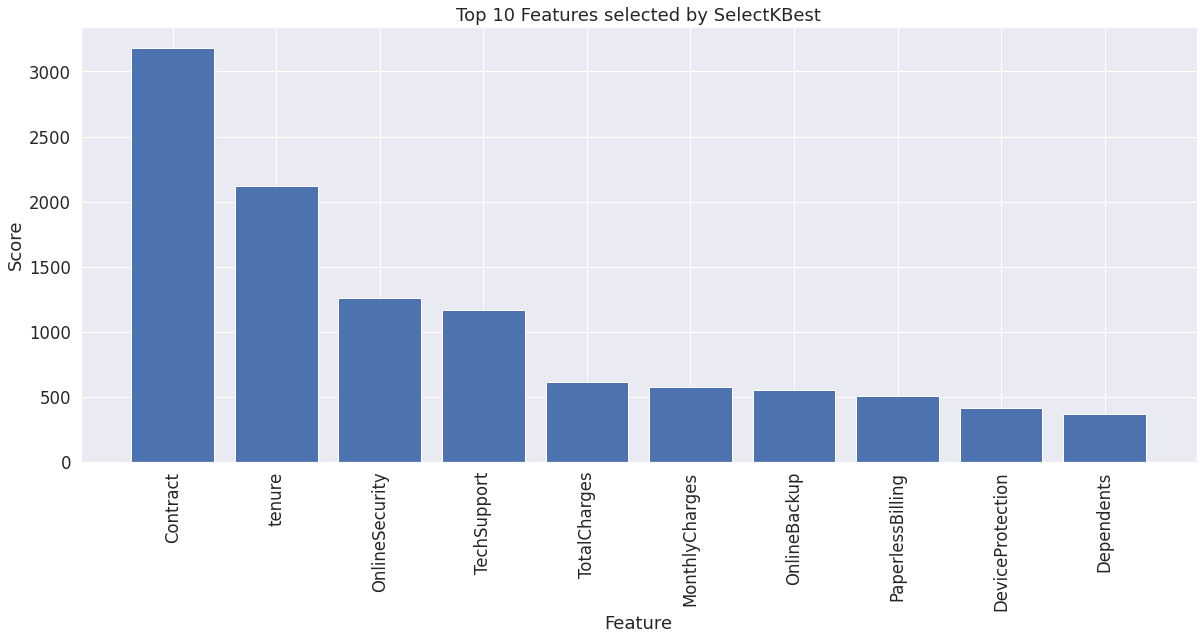

In [ ]:




# Get the names and scores of the top 10 features
feature_names = df.drop('Churn', axis=1).columns
top_scores = selector.scores_.argsort()[-10:][::-1]
top_features = feature_names[top_scores]

# Print the names and scores of the top 10 features
for i, feature in enumerate(top_features):
    print("{}. {} ({:.2f})".format(i+1, feature, selector.scores_[top_scores][i]))

# Create a bar plot of the top 10 features and their scores
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.bar(range(len(top_scores)), selector.scores_[top_scores])
plt.xticks(range(len(top_scores)), top_features, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Top 10 Features selected by SelectKBest")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
# select the top K features using f_classic
kbest = SelectKBest(score_func=f_classif, k=10)
X_resampled = kbest.fit_transform(X_resampled, y_resampled)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state = 30)


In [ ]:


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform (X_test)


In [ ]:


# train a decision tree classifier on the data
clf = DecisionTreeClassifier()

#clf = RandomForestClassifier()

clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1543
           1       0.80      0.92      0.86      1555

    accuracy                           0.85      3098
   macro avg       0.85      0.84      0.84      3098
weighted avg       0.85      0.85      0.84      3098



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.85


The confusion matrix is:
[[1193  350]
 [ 130 1425]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1543
           1       0.80      0.92      0.86      1555

    accuracy                           0.85      3098
   macro avg       0.85      0.84      0.84      3098
weighted avg       0.85      0.85      0.84      3098



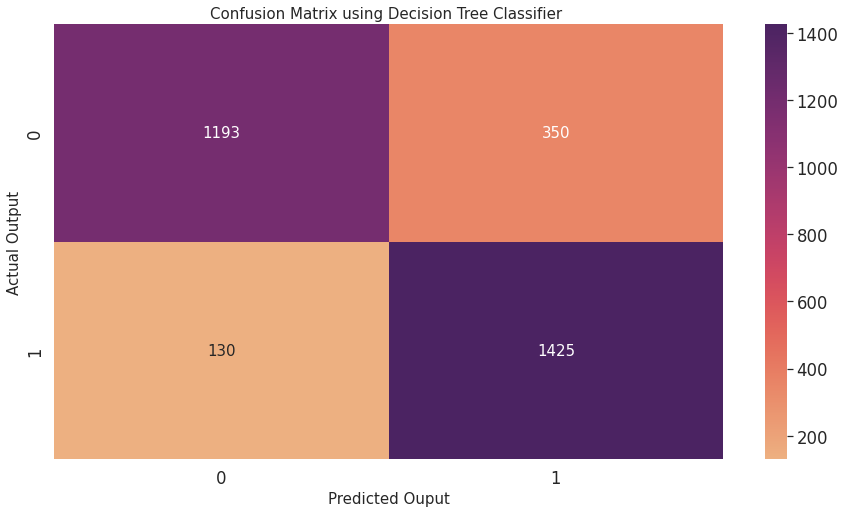

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Decision Tree Classifier ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:

# Define the Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'max_depth': [12, 15, 20],
              'min_samples_split': [2,3, 4, 6, 8,],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X, y)

# Print the results
print("Best accuracy score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


Best accuracy score: 0.87
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:


# Using best hypeparameter


# train a decision tree classifier on the data
clf = DecisionTreeClassifier(max_depth= 20, min_samples_leaf = 1, min_samples_split= 2)

#clf = RandomForestClassifier()

clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1543
           1       0.80      0.92      0.86      1555

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.84      3098
weighted avg       0.85      0.85      0.84      3098



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.85


The confusion matrix is:
[[1190  353]
 [ 125 1430]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1543
           1       0.80      0.92      0.86      1555

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.84      3098
weighted avg       0.85      0.85      0.84      3098



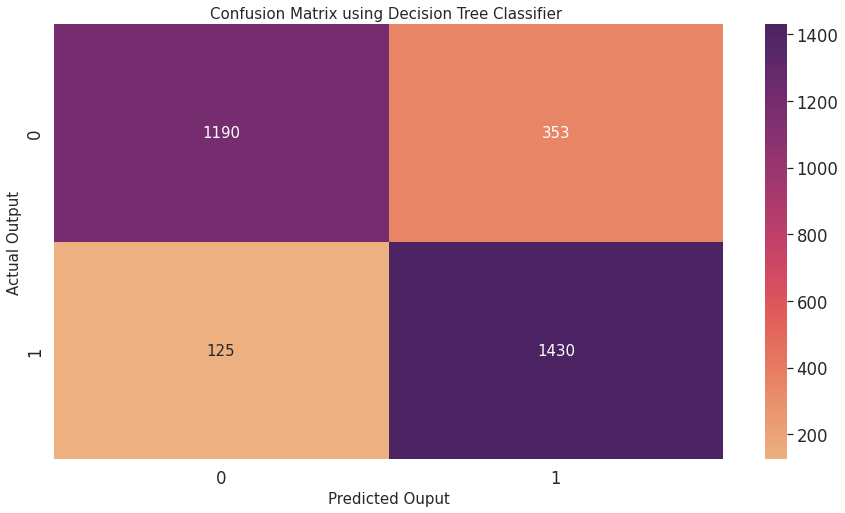

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Decision Tree Classifier ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
#Using RandomForest

# train a decision tree classifier on the data
#clf = DecisionTreeClassifier()

clf = RandomForestClassifier()

clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1543
           1       0.85      0.95      0.89      1555

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.89


The confusion matrix is:
[[1280  263]
 [  85 1470]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1543
           1       0.85      0.95      0.89      1555

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



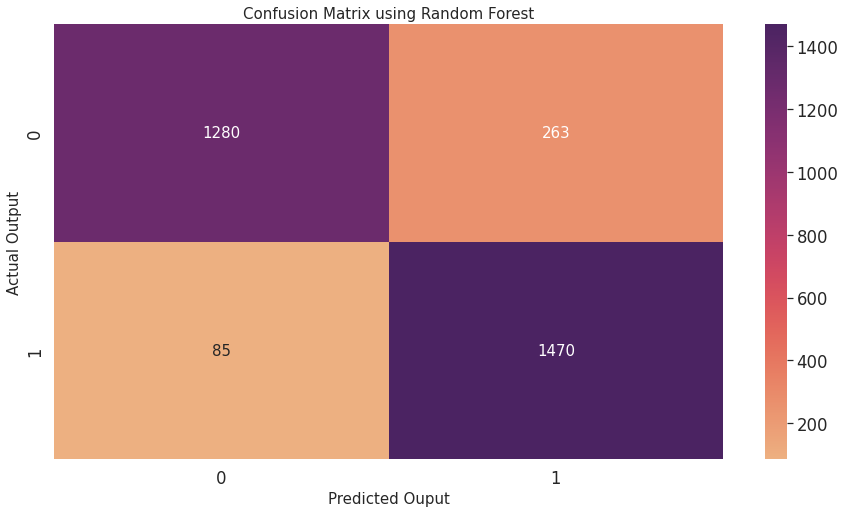

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare',annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Random Forest', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# GRADIENT BOOSTED DECISION TREE

#Using Gradient Boosted Decision Tree
# train a decision tree classifier on the data
#clf = DecisionTreeClassifier()
#clf = RandomForestClassifier()

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=14, random_state=42)
clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1543
           1       0.85      0.94      0.89      1555

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.89


The confusion matrix is:
[[1294  249]
 [  96 1459]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1543
           1       0.85      0.94      0.89      1555

    accuracy                           0.89      3098
   macro avg       0.89      0.89      0.89      3098
weighted avg       0.89      0.89      0.89      3098



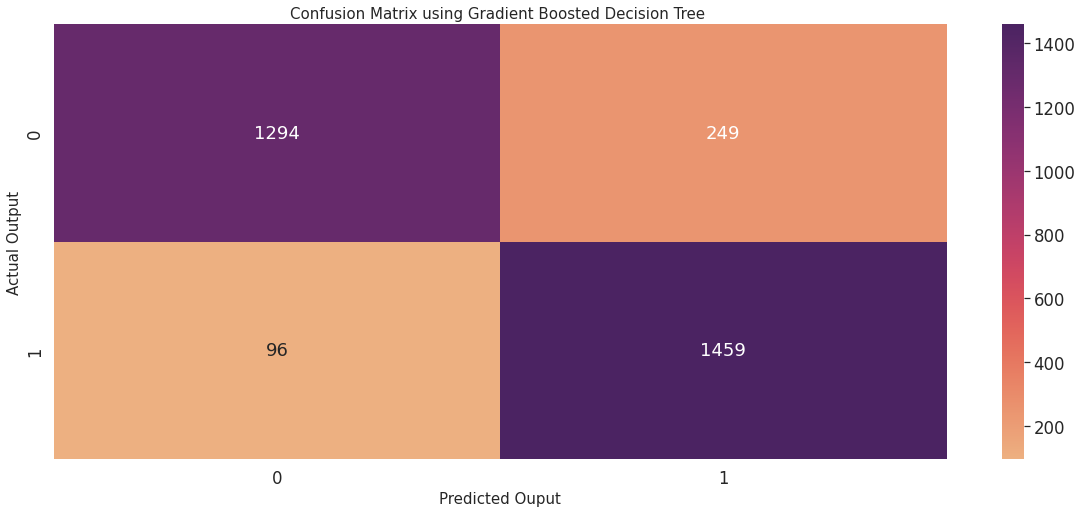

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Gradient Boosted Decision Tree ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Identifying top 10 features driving the Gradient Boosted Decision model by allowing the model to select importance features itself

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 40)



In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform (X_test)

In [ ]:

# Step 4: Model Evaluation
from sklearn.metrics import f1_score

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=18, random_state=42)
clf.fit(X_train_scale, y_train)
y_pred = clf.predict(X_test_scale)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

F1-score: 0.8707


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.86


The confusion matrix is:
[[1238  304]
 [ 122 1434]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1542
           1       0.83      0.92      0.87      1556

    accuracy                           0.86      3098
   macro avg       0.87      0.86      0.86      3098
weighted avg       0.87      0.86      0.86      3098



In [ ]:
#Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df.drop('Churn', axis=1).columns


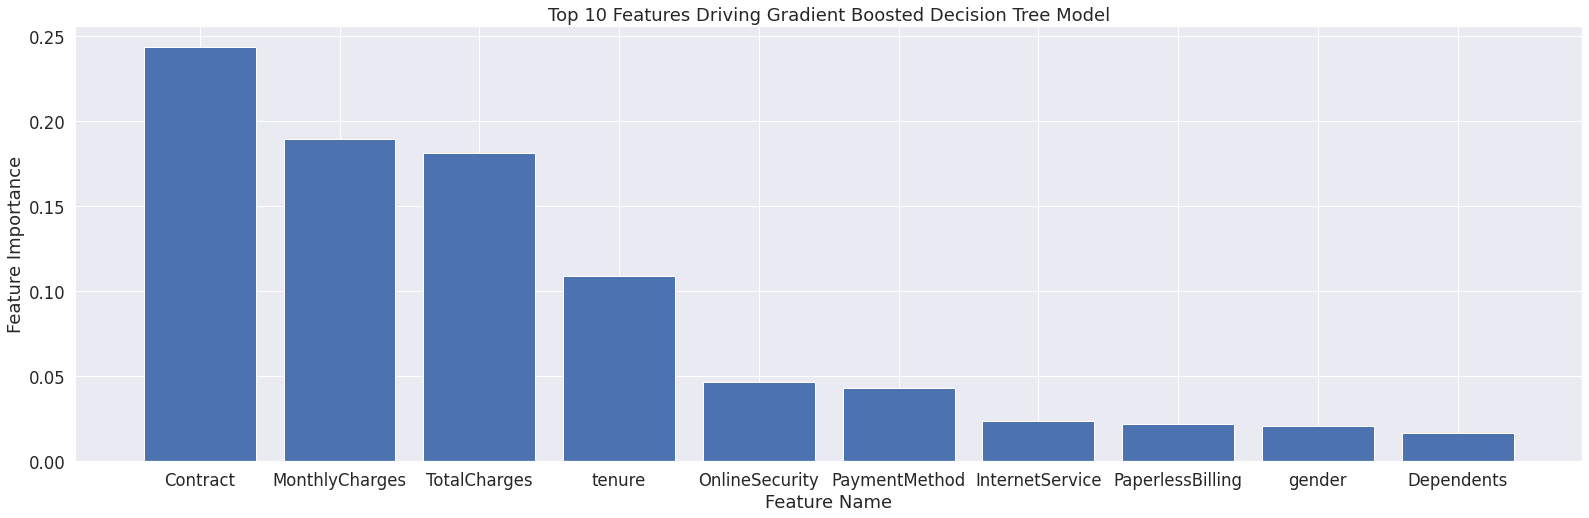

In [ ]:

# Step 6: Plot Feature Importance Graph


top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:10]
plt.figure(figsize=(27,8))
plt.bar(top_features.index, top_features)
plt.title('Top 10 Features Driving Gradient Boosted Decision Tree Model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()

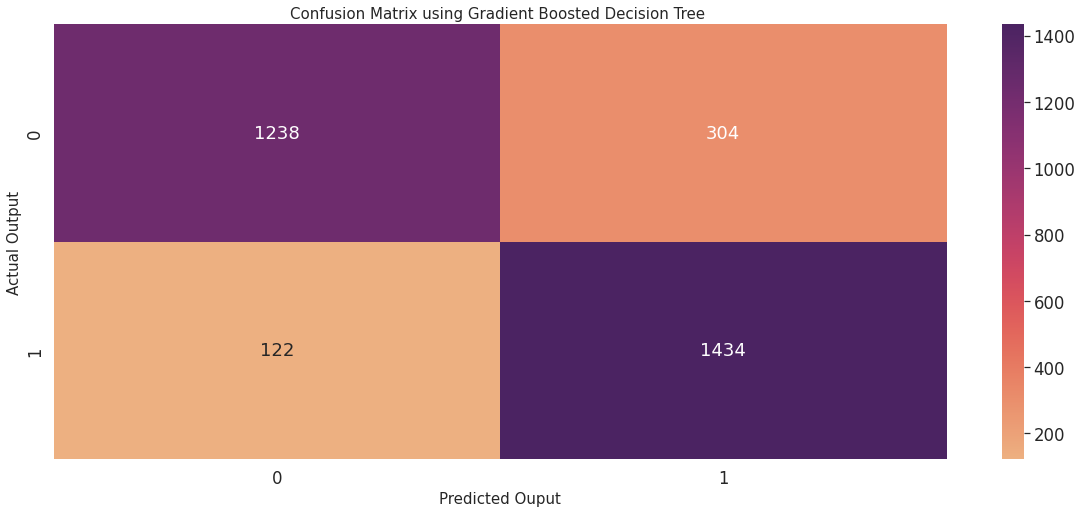

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Gradient Boosted Decision Tree ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Model 3    Allowing Random Fores to use  most important features

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =40)




In [ ]:
scaler = StandardScaler()
X_train_scale2 = scaler.fit_transform(X_train)
X_test_scale2 = scaler.transform (X_test)

In [ ]:
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=18, random_state=42)
clf = RandomForestClassifier()

clf.fit(X_train_scale2, y_train)
y_pred = clf.predict(X_test_scale2)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

F1-score: 0.8835


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.88


The confusion matrix is:
[[1258  284]
 [ 100 1456]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1542
           1       0.84      0.94      0.88      1556

    accuracy                           0.88      3098
   macro avg       0.88      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098



In [ ]:
#Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df.drop('Churn', axis=1).columns

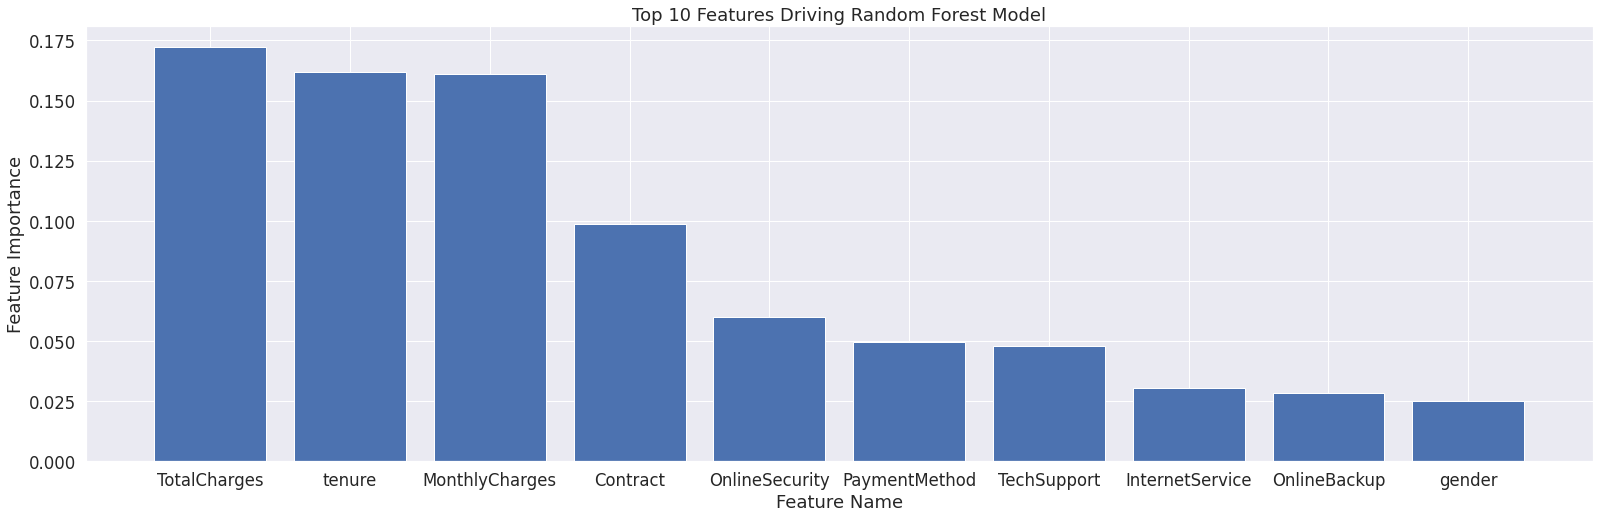

In [ ]:
top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:10]
plt.figure(figsize=(27,8))
plt.bar(top_features.index, top_features)
plt.title('Top 10 Features Driving Random Forest Model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()

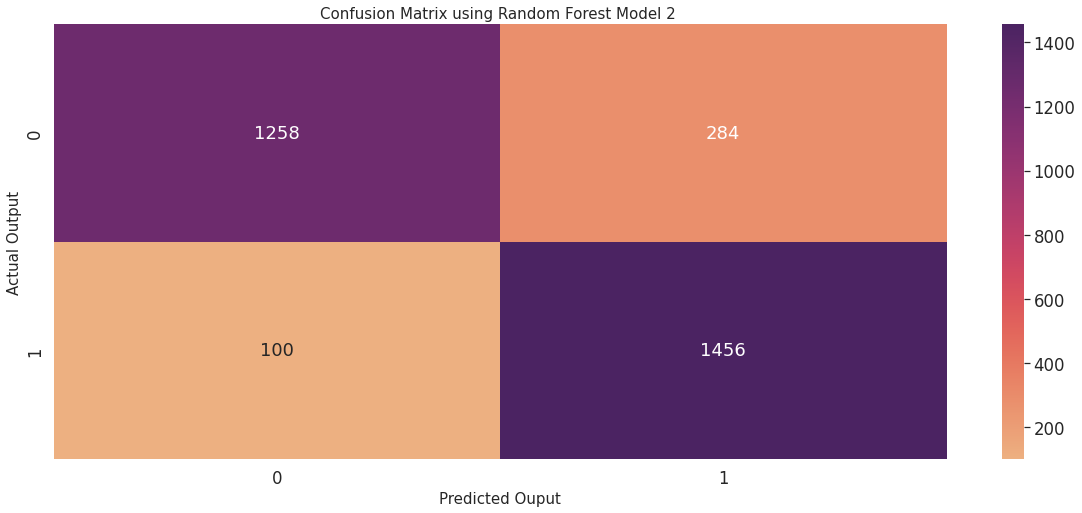

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Random Forest Model 2 ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()